In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib
import warnings
from  sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,roc_auc_score,f1_score,recall_score,roc_curve,auc,precision_score

In [4]:
df=pd.read_csv('E:\private\Intern\Micro-Credit-Project\Micro Credit Project\Data_file.csv')

In [5]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [6]:
#we can drop Unnamed: column as it is just an identifier ...Also lets drop pdate as it is not relevant in our test case
df=df.drop(['Unnamed: 0','pdate'],axis=1)

In [7]:
df.shape

(209593, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

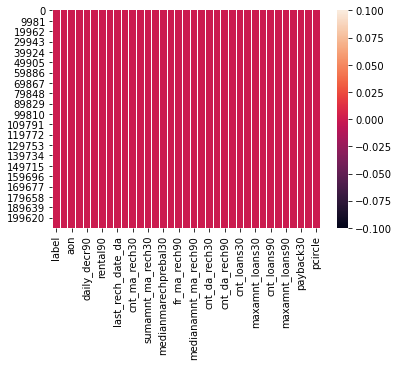

In [9]:
#There is no null values present in dataset
sns.heatmap(data=df.isna())
#below heatmap tells that thr is no null value present in dataset

In [10]:
df.isin(['?','-']).sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
dtype: int64

In [11]:
df.msisdn.value_counts()

47819I90840    7
04581I85330    7
42825I88688    6
30080I90588    6
22038I88658    6
              ..
00937I90846    1
62895I84459    1
53645I70781    1
01250I84459    1
08667I88648    1
Name: msisdn, Length: 186243, dtype: int64

In [12]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [13]:
#If we see above output ,we can find that pcircle column has same value across all rows that is 209593.
#So it will not add any value to our test case .So we can drop this column
df=df.drop('pcircle',axis=1)
df.shape

(209593, 34)

In [14]:
df.sample(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
125932,1,83446I82732,72.0,177.540000,177.540000,1725.12,1725.12,3.0,0.0,5787,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
173050,1,18385I88658,210.0,9985.000000,12699.160000,991.66,2299.09,6.0,0.0,1539,...,4,24,6.0,0.0,5.0,30,6,0.0,2.250000,2.200000
207896,1,10102I85328,1582.0,3129.000000,3467.990000,0.00,96.90,51.0,0.0,4917,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
189699,1,61727I90844,401.0,70.833333,70.833333,487.75,487.75,4.0,0.0,770,...,3,18,6.0,0.0,3.0,18,6,0.0,3.000000,3.000000
70094,1,24929I89235,1429.0,22371.000000,27855.060000,1043.48,3924.84,4.0,0.0,8000,...,1,12,12.0,0.0,2.0,18,12,0.0,0.000000,0.000000
113756,0,95112I85348,557.0,627.540000,630.600000,1700.46,1889.40,23.0,0.0,1547,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
19187,0,47621I85328,524.0,-2.300000,-2.300000,0.00,0.00,0.0,0.0,0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
12152,1,11290I82731,1295.0,2612.000000,2612.000000,400.26,400.26,1.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,2.500000,2.500000
198227,0,84719I85349,67.0,45.877333,45.877333,177.28,177.28,2.0,0.0,1539,...,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667
92660,0,13547I88659,145.0,4059.500000,4065.000000,519.34,588.86,1.0,0.0,770,...,2,12,6.0,0.0,3.0,18,6,0.0,19.000000,18.666667


In [15]:
#drop msisdn
df=df.drop('msisdn',axis=1)
df.shape

(209593, 33)

In [16]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [17]:
df=df[df.aon>=0]
df.shape

(208054, 33)

In [18]:
df_90=df.loc[ (df.maxamnt_loans90==0) | (df.maxamnt_loans90==12) | (df.maxamnt_loans90==6) ]
df_90

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [19]:
df_30=df_90.loc[(df_90.maxamnt_loans30==0) | (df_90.maxamnt_loans30==12) | (df_90.maxamnt_loans30==6) ]
df_30

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [20]:
print(df_30.shape)
df_30.isin([0]).sum()

(207019, 33)


label                    25546
aon                          0
daily_decr30              4124
daily_decr90              4043
rental30                  7526
rental90                  6878
last_rech_date_ma        20457
last_rech_date_da       200327
last_rech_amt_ma         20706
cnt_ma_rech30            27601
fr_ma_rech30             77027
sumamnt_ma_rech30        27601
medianamnt_ma_rech30     27601
medianmarechprebal30     30232
cnt_ma_rech90            20662
fr_ma_rech90             64301
sumamnt_ma_rech90        20662
medianamnt_ma_rech90     20662
medianmarechprebal90     23034
cnt_da_rech30           202935
fr_da_rech30            205454
cnt_da_rech90           201680
fr_da_rech90            206156
cnt_loans30               3243
amnt_loans30              3243
maxamnt_loans30           3243
medianamnt_loans30      193092
cnt_loans90               2023
amnt_loans90              2030
maxamnt_loans90           2030
medianamnt_loans90      195065
payback30               104754
payback9

In [21]:
#We can drop columns having almost 80% or more 0 values .medianamnt_loans90,medianamnt_loans30,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,last_rech_date_da
#Rest we can fill with mean value

df_30=df_30.drop(['medianamnt_loans90','medianamnt_loans30','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','last_rech_date_da'],axis=1)
df_30.shape

(207019, 26)

In [22]:
for col in df_30.columns:
    if(col!='label'):
        simpleImputer=SimpleImputer(missing_values=0,strategy='mean')
        df_30[col]=simpleImputer.fit_transform(df_30[[col]]).ravel()

In [23]:
df_30.isin([0]).sum()

label                   25546
aon                         0
daily_decr30                0
daily_decr90                0
rental30                    0
rental90                    0
last_rech_date_ma           0
last_rech_amt_ma            0
cnt_ma_rech30               0
fr_ma_rech30                0
sumamnt_ma_rech30           0
medianamnt_ma_rech30        0
medianmarechprebal30        0
cnt_ma_rech90               0
fr_ma_rech90                0
sumamnt_ma_rech90           0
medianamnt_ma_rech90        0
medianmarechprebal90        0
cnt_loans30                 0
amnt_loans30                0
maxamnt_loans30             0
cnt_loans90                 0
amnt_loans90                0
maxamnt_loans90             0
payback30                   0
payback90                   0
dtype: int64

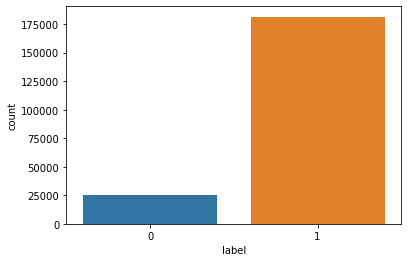

In [24]:
sns.countplot(data=df_30,x='label')
#Label-1 has more count compare to Label-0
#Means defaulter count is less .

In [25]:
df_ordered=df_30.sort_values(by='amnt_loans30',ascending=False)
df_ordered_20=df_ordered.head(20)
df_ordered_20
# here people with level1 returning loan amount in time that is within 2 days .
#Also loan count is more compare to lavel0
#Also people are recharging their main account in every one or two days

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
16701,1,1251.000000,161598.000000,192796.540,13662.34,16415.57,2.0000,4048.0,35.0,1.000000,...,4048.0,60.030,26.0,306.0,12.0,26.0,306.0,12.0,1.240000,1.240000
124650,1,123.000000,1097.800000,1097.800,7187.50,7187.50,1.0000,770.0,91.0,5970.330271,...,773.0,18.900,50.0,300.0,6.0,50.0,300.0,6.0,1.235294,1.235294
12680,1,212.000000,139127.000000,193414.330,18120.34,32457.24,1.0000,10000.0,61.0,5970.330271,...,1539.0,262.500,23.0,276.0,12.0,44.0,408.0,12.0,1.384615,1.326087
181455,1,364.000000,60940.000000,85782.390,10590.82,17608.77,1.0000,1539.0,40.0,5970.330271,...,1539.0,29.500,23.0,276.0,12.0,37.0,384.0,12.0,1.863636,2.351351
82461,1,156.000000,55826.840000,81988.930,34678.94,57877.33,1.0000,2309.0,23.0,1.000000,...,1539.0,113.000,23.0,276.0,12.0,38.0,438.0,12.0,1.500000,1.538462
20859,1,161.000000,59560.000000,66623.640,9838.73,12304.49,1.0000,1539.0,29.0,1.000000,...,1539.0,74.000,23.0,270.0,12.0,38.0,396.0,12.0,1.600000,1.974359
101019,1,116.000000,966.064000,966.064,6325.00,6325.00,1.0000,1539.0,77.0,5970.330271,...,773.0,18.900,44.0,264.0,6.0,44.0,264.0,6.0,1.250000,1.250000
193084,1,689.000000,212202.000000,254657.130,22563.55,26672.14,1.0000,10000.0,28.0,1.000000,...,4048.0,41.330,22.0,264.0,12.0,40.0,408.0,12.0,1.653846,1.863636
29079,1,1260.000000,67452.000000,82024.490,28856.25,39711.41,1.0000,4048.0,23.0,1.000000,...,2309.0,129.110,22.0,264.0,12.0,41.0,378.0,12.0,1.500000,1.390244
88958,1,150.000000,42282.273333,42458.640,6539.03,7732.03,1.0000,2309.0,23.0,1.000000,...,1539.0,55.500,22.0,258.0,12.0,30.0,306.0,12.0,1.809524,2.137931


In [26]:
df_0=df_30[df_30.label==0]
df_ordered_ascend=df_0.sort_values(by='amnt_loans30')
df_ordered_ascend_20=df_ordered_ascend.head(20)
df_ordered_ascend_20
#here we are checking the payback30 and payback90 value for  defaulter who has taken max loan amount 
#It  is clear that people who has taken loan did not return in last 90 days .
#Main account recharge is not 49,7,9 which more more than level1 user

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
104314,0,1319.0,-3.066667,-3.066667,2805.373211,3619.71051,4171.304191,2303.113937,4.614041,5970.330271,...,2079.128863,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129234,0,454.0,1004.800000,1006.000000,24.000000,30.00000,7.000000,770.000000,1.000000,5970.330271,...,770.000000,30.000000,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129231,0,2018.0,2.272000,2.272000,2805.373211,3619.71051,49.000000,2320.000000,4.614041,5970.330271,...,2320.000000,18.850000,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129226,0,1245.0,5530.075881,6248.260176,1278.300000,1278.30000,4171.304191,2303.113937,4.614041,5970.330271,...,2079.128863,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129223,0,2013.0,8.213333,8.213333,559.360000,559.36000,4.000000,1547.000000,1.000000,5970.330271,...,1547.000000,4.280000,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129219,0,1145.0,1.166667,1.166667,117.950000,117.95000,4171.304191,2303.113937,4.614041,5970.330271,...,2079.128863,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129202,0,928.0,500.000000,500.000000,979.250000,1175.10000,4171.304191,2303.113937,4.614041,5970.330271,...,2079.128863,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129198,0,1210.0,16.674667,16.674667,2099.760000,2099.76000,9.000000,1924.000000,1.000000,5970.330271,...,1924.000000,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129192,0,1031.0,-0.700000,-0.700000,219.240000,219.24000,4171.304191,2303.113937,4.614041,5970.330271,...,2079.128863,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471
129185,0,563.0,5530.075881,6248.260176,78.300000,78.30000,4171.304191,2303.113937,4.614041,5970.330271,...,2079.128863,103.982912,1.0,6.0,6.0,1.0,6.0,6.0,6.90904,7.940471


In [27]:
#df_30.groupby(['label']).agg({'payback30':'mean','payback30':'mean','payback90':'mean','rental30':'mean','rental90':'mean',})

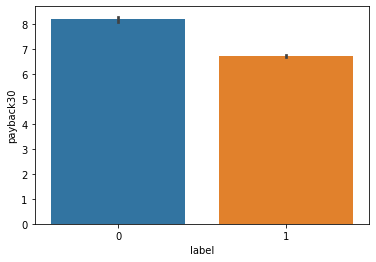

In [28]:
sns.barplot(data=df_30,x='label',y='payback30')
#Lavel1 user payback rate is good compare to lavel0 user

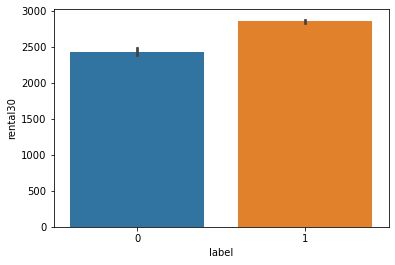

In [29]:
sns.barplot(data=df_30,x='label',y='rental30')
#Lavel1 user maintaining higher main account balance compare to lavel0 user

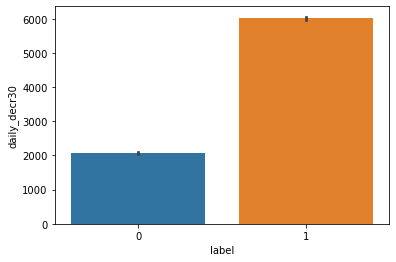

In [30]:
sns.barplot(data=df_30,x='label',y='daily_decr30')
#Daily spend is very high for lavel1 user comapre to lavel0 user

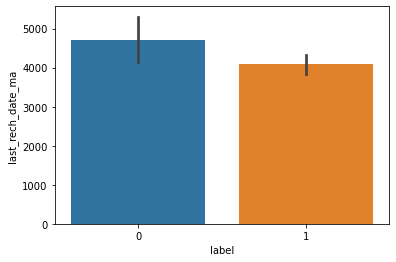

In [31]:
sns.barplot(data=df_30,x='label',y='last_rech_date_ma')
#Lavel1 user reacharging main account more frequently compare to lavel0 user

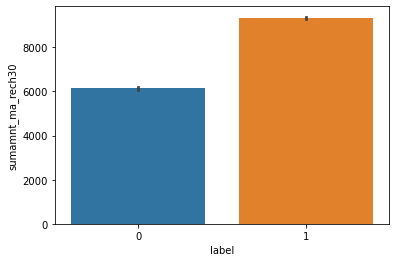

In [32]:
sns.barplot(data=df_30,x='label',y='sumamnt_ma_rech30')
#Total amount to recharge main account for user1  is greater than recharge amount of label0 user

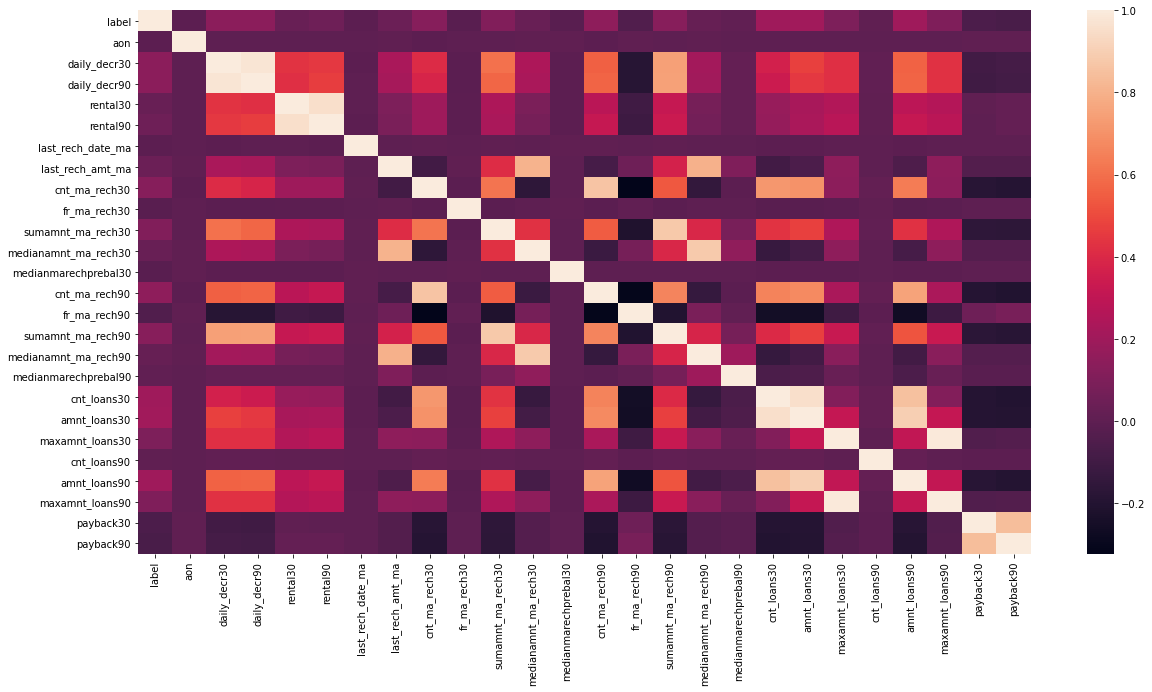

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_30.corr())

In [34]:
#daily_decr_30 is highly corelated with daily_decr_90.We can drop any one of the column .
#cnt_loans30 is highly  corelated with cnt_loans90
#maxamnt_loans30 is highly  corelated with maxamnt_loans90 
#amnt_loans30 and amnt_loans90
#amnt_loans30 and cnt_loan30
#rental30 and rental90

df_final=df_30.drop(['daily_decr90','cnt_loans90','maxamnt_loans90','cnt_loans30','rental90'],axis=1)
df_final.shape

(207019, 21)

In [35]:
df_final.label.value_counts()

1    181473
0     25546
Name: label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029FD7052BE0>,
      dtype=object)

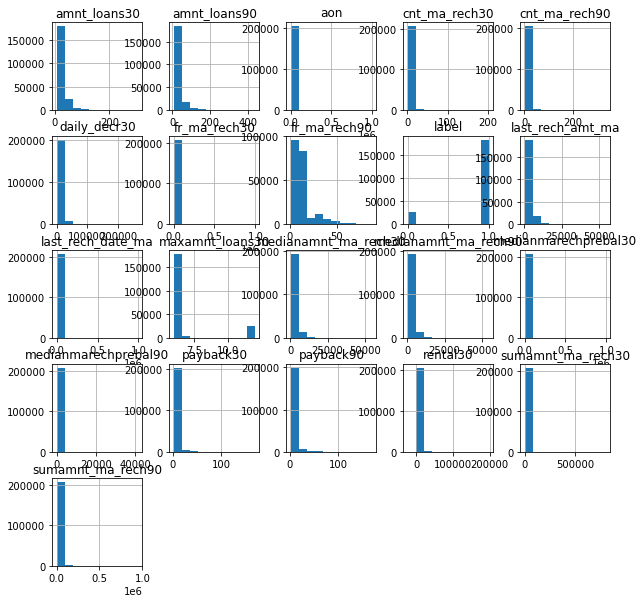

In [36]:
df_final.hist(figsize=(10,10))
#from below graph we can see thr r few skewed data present in dataset .
#columns like amnt_loans30,amnt_loans30,cnt_loans30,fr_ma_rech90,has skewed data

In [37]:
df_final.skew()

label                   -2.290113
aon                     10.341915
daily_decr30             3.947145
rental30                 4.561383
last_rech_date_ma       14.773415
last_rech_amt_ma         4.085069
cnt_ma_rech30            3.746573
fr_ma_rech30            14.691965
sumamnt_ma_rech30        7.060954
medianamnt_ma_rech30     3.912864
medianmarechprebal30    14.747400
cnt_ma_rech90            3.683266
fr_ma_rech90             2.184508
sumamnt_ma_rech90        5.169014
medianamnt_ma_rech90     4.083159
medianmarechprebal90    45.202345
amnt_loans30             3.015290
maxamnt_loans30          2.242978
amnt_loans90             3.161622
payback30                9.373269
payback90                7.624387
dtype: float64

In [38]:
df_final.isna().sum()

label                   0
aon                     0
daily_decr30            0
rental30                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
amnt_loans30            0
maxamnt_loans30         0
amnt_loans90            0
payback30               0
payback90               0
dtype: int64

In [39]:
#remove skewed data
for col in df_final.columns:
    if((col!='label') & (df_final[col].skew()>0.55)):
        with warnings.catch_warnings():
            warnings.filterwarnings('error')
            try:
                df_final[col]=np.log1p(df_final[col])
            except Warning as e:
                print(col, e)
                    
          
        

daily_decr30 divide by zero encountered in log1p
rental30 divide by zero encountered in log1p
last_rech_date_ma divide by zero encountered in log1p
medianmarechprebal30 invalid value encountered in log1p
medianmarechprebal90 divide by zero encountered in log1p


In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207019 entries, 0 to 209592
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 207019 non-null  int64  
 1   aon                   207019 non-null  float64
 2   daily_decr30          207019 non-null  float64
 3   rental30              207019 non-null  float64
 4   last_rech_date_ma     207019 non-null  float64
 5   last_rech_amt_ma      207019 non-null  float64
 6   cnt_ma_rech30         207019 non-null  float64
 7   fr_ma_rech30          207019 non-null  float64
 8   sumamnt_ma_rech30     207019 non-null  float64
 9   medianamnt_ma_rech30  207019 non-null  float64
 10  medianmarechprebal30  207019 non-null  float64
 11  cnt_ma_rech90         207019 non-null  float64
 12  fr_ma_rech90          207019 non-null  float64
 13  sumamnt_ma_rech90     207019 non-null  float64
 14  medianamnt_ma_rech90  207019 non-null  float64
 15  

In [41]:
df_final=df_final.dropna()

label                      AxesSubplot(0.125,0.749828;0.133621x0.130172)
aon                     AxesSubplot(0.285345,0.749828;0.133621x0.130172)
daily_decr30             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
rental30                AxesSubplot(0.606034,0.749828;0.133621x0.130172)
last_rech_date_ma       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
last_rech_amt_ma           AxesSubplot(0.125,0.593621;0.133621x0.130172)
cnt_ma_rech30           AxesSubplot(0.285345,0.593621;0.133621x0.130172)
fr_ma_rech30             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
medianmarechprebal30       AxesSubplot(0.125,0.437414;0.133621x0.130172)
cnt_ma_rech90           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
fr_ma_rech90             AxesSubplot(0.44569,0.437414;0.133621x0.130172)
sumamnt_ma_rech90       AxesSubplot(0.606034,0.4374

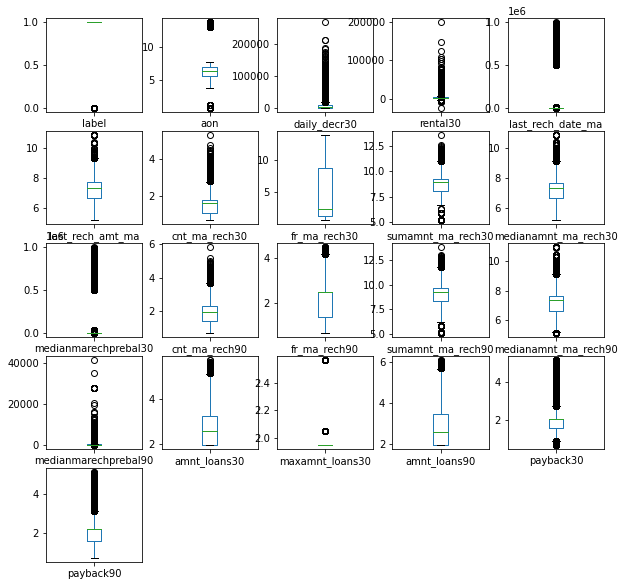

In [42]:
df_final.plot.box(subplots=True,layout=(5,5),figsize=(10,10))

In [43]:
#outlier present in dataset
#remove outlier

with warnings.catch_warnings():
    warnings.filterwarnings('error')
    try:
        z=np.abs(zscore(df_final))
    except Warning as e:
        print(col, e)
   


In [44]:
df_final=df_final[(z<3).all(axis=1)]
df_final.shape

(187972, 21)

In [45]:
df_final.label.value_counts()

1    164247
0     23725
Name: label, dtype: int64

In [46]:
x=df_final.drop('label',axis=1)
y=df_final['label']
print(x.shape,y.shape)

(187972, 20) (187972,)


In [47]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-6.32414697e-01, -2.27816996e-01, -7.09259178e-01, ...,
        -3.20660457e-01,  3.41111985e+00,  2.88593361e+00],
       [ 4.73431228e-01,  1.19166137e+00,  4.83420743e-01, ...,
        -3.20660457e-01,  4.26208271e-01,  4.71027100e-01],
       [ 1.44736498e-01, -4.87236826e-01, -4.75611246e-01, ...,
        -1.09992645e+00,  4.26208271e-01,  4.71027100e-01],
       ...,
       [ 8.79107618e-01,  1.14799995e+00,  1.22922838e+00, ...,
         1.49505758e+00, -6.00491343e-01, -7.55870179e-01],
       [ 1.49647575e+00,  1.24899633e+00, -6.43391077e-01, ...,
         5.02522707e-01,  4.26208271e-01,  9.73231972e-01],
       [ 1.39146274e+00, -3.26796261e-03, -6.18620960e-01, ...,
         1.57052991e-01,  4.26208271e-01,  4.71027100e-01]])

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
lr_reg=LogisticRegression()
mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC()
dtree_reg=DecisionTreeClassifier()
kn_reg=KNeighborsClassifier()
sgd_reg=SGDClassifier()
gradient_reg=GradientBoostingClassifier()
ada_reg=AdaBoostClassifier()
rand_reg=RandomForestClassifier()

In [64]:
models=[]
models.append(('LogisticRegression',lr_reg))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('RandomForestClassifier',rand_reg))

In [65]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=5,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    roc_auc_score_list.append(roc_auc_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred,average='macro'))
    model_name_list.append(reg_name)
    

In [66]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list,'roc_auc_score':roc_auc_score_list,'f1_score':f1_score_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score,roc_auc_score,f1_score
0,LogisticRegression,0.882296,0.881261,0.570134,0.591130
1,DecisionTreeClassifier,0.863559,0.864503,0.706710,0.702029
2,KNeighborsClassifier,0.888377,0.887059,0.661127,0.691907
3,RandomForestClassifier,0.910503,0.910201,0.708099,0.751760


In [68]:
#From above matrix RandomForestClassifier performing good compare to ther model .Here cross_val_score,accuracy_score,roc_auc_score and f1-macro score is heigher than other model. 
#Lets finetune the model by using hyperparameter

def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=5)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [69]:
param={'n_estimators':[100,200,300],'criterion':['gini','entropy']}
print(findBestParam(rand_reg,param))

{'criterion': 'gini', 'n_estimators': 300}


In [70]:

rand_reg=RandomForestClassifier(criterion='gini',n_estimators=300)
rand_reg.fit(x_train,y_train)
y_pred=rand_reg.predict(x_test)
print(' train score',rand_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

 train score 0.9995411532348697
accuracy_score 0.9100146296050007
confusion_matrix 
 [[ 2075  2713]
 [  670 32137]]
classification_report               precision    recall  f1-score   support

           0       0.76      0.43      0.55      4788
           1       0.92      0.98      0.95     32807

    accuracy                           0.91     37595
   macro avg       0.84      0.71      0.75     37595
weighted avg       0.90      0.91      0.90     37595



0.7064763168067902


Text(0, 0.5, 'True +ve Rate')

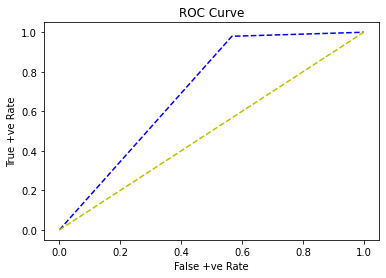

In [71]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr,'b--')
plt.plot([0,1],[0,1],'y--')
#plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
